In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('LoanDataset - LoansDatasest.csv')

# Обзор датасета

## Значение колонок
- customer_id - идентификатор клиента  
- customer_age - возраст клиента  
- customer_income - ежегодны заработок клиента  
- home_ownership - недвижимость (сдает, свое, ипотека)  
- employment_duration - месяцев работает  
- loan_intent - цель заема  
- loan_grade - оценка заема 
- loan_amnt - запрошенная сумма кредита
- loan_int_rate - процентная ставка  
- term_years - срок кредита  
- historical_default - есть ли у клиента невыплаченный кредит  
- cred_hist_length - кредитная история клиента в годах
- Current_loan_status - статус кредита (default(не погашен)/no default(погашен))

In [3]:
df.head()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT
1,2.0,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,NaN,2,NO DEFAULT
2,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT
3,4.0,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT
4,5.0,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT


# Очистка данных

## Работа с пропущенными значениями

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32586 entries, 0 to 32585
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          32583 non-null  float64
 1   customer_age         32586 non-null  int64  
 2   customer_income      32586 non-null  object 
 3   home_ownership       32586 non-null  object 
 4   employment_duration  31691 non-null  float64
 5   loan_intent          32586 non-null  object 
 6   loan_grade           32586 non-null  object 
 7   loan_amnt            32585 non-null  object 
 8   loan_int_rate        29470 non-null  float64
 9   term_years           32586 non-null  int64  
 10  historical_default   11849 non-null  object 
 11  cred_hist_length     32586 non-null  int64  
 12  Current_loan_status  32582 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 3.2+ MB


In [5]:
df = df.drop('customer_id', axis=1)

In [6]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)

Text(0.5, 1.0, 'Число пропусков')

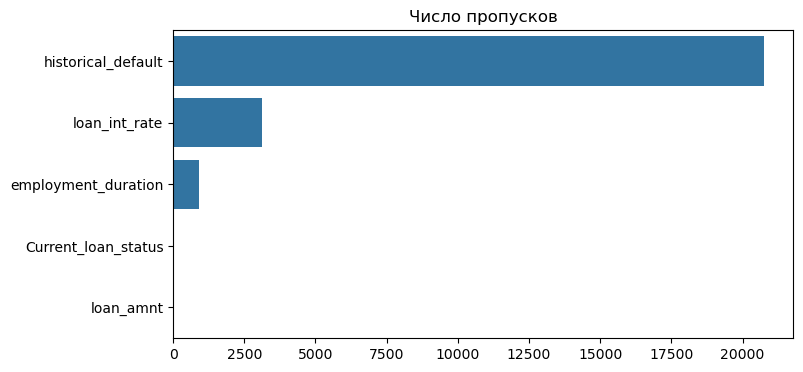

In [7]:
plt.figure(figsize = (8, 4))
sns.barplot(missing_values, orient='h').set_title('Число пропусков')

### loan_amnt

In [8]:
df['loan_amnt'].head()

0    £35,000.00
1     £1,000.00
2     £5,500.00
3    £35,000.00
4    £35,000.00
Name: loan_amnt, dtype: object

In [9]:
df[df['loan_amnt'].isna()]

,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
218,23,78000,RENT,7.0,DEBTCONSOLIDATION,B,NaN,NaN,3,Y,2,DEFAULT


Допустимо удаление, так как хотелось бы получить сумму кредита. Однако можно попробовать, например, получить среднее количество долга для среднего возраста клиента или же по цели кредита.

Так как 23 - средний возраст выпускника университета, можно взять группу скажем от 21 до 27.

Следует обработать признак loan_amnt

Из колонки следует убрать обозначение валюты и убрать запятые. После точек - не учитывать нули

In [10]:
import re
def clear_loan_amnt(x):
    currency = '£'
    if x is np.nan:
        return 0
    new_string = x.replace('£', '').replace(',','').replace('.00', '')
    return float(new_string)

In [11]:
df['loan_amnt'] = df['loan_amnt'].apply(clear_loan_amnt)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32586 entries, 0 to 32585
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_age         32586 non-null  int64  
 1   customer_income      32586 non-null  object 
 2   home_ownership       32586 non-null  object 
 3   employment_duration  31691 non-null  float64
 4   loan_intent          32586 non-null  object 
 5   loan_grade           32586 non-null  object 
 6   loan_amnt            32586 non-null  float64
 7   loan_int_rate        29470 non-null  float64
 8   term_years           32586 non-null  int64  
 9   historical_default   11849 non-null  object 
 10  cred_hist_length     32586 non-null  int64  
 11  Current_loan_status  32582 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 3.0+ MB


In [13]:
age_group = df[(df['customer_age'] >= 21) & (df['customer_age'] <= 27)]

<AxesSubplot: xlabel='customer_age', ylabel='loan_amnt'>

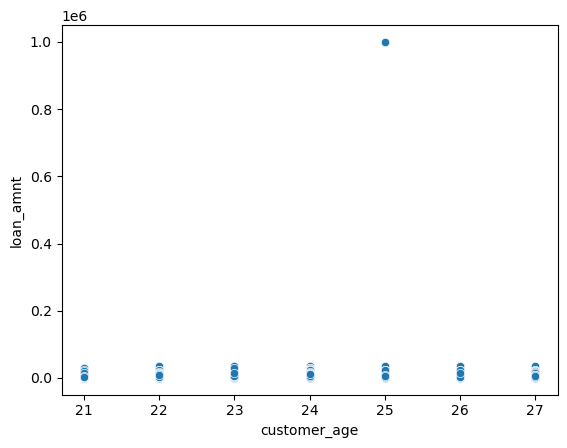

In [14]:
sns.scatterplot(age_group, x = 'customer_age', y = 'loan_amnt')

Посмотрим на все возрасты

(0.0, 140.0, 0.0, 40000.0)

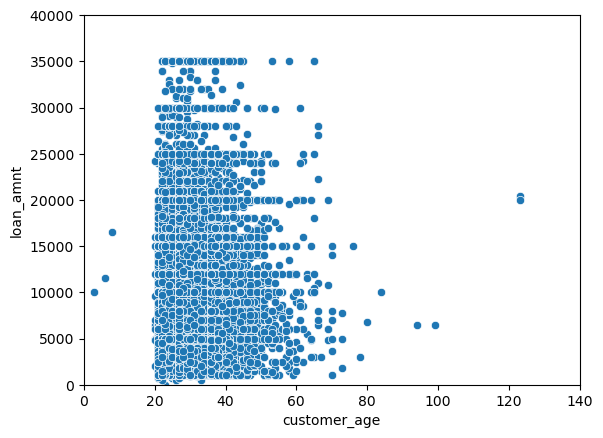

In [15]:
sns.scatterplot(df, x = 'customer_age', y = 'loan_amnt')
plt.axis([0, 140,0, 40000])

Глядя на графики можно отметить:  
    - 3 случая, когда кредит был оформлен на людей младше 20 лет  
    - один 25-летний взял кредит на один миллион (можно убрать)  
    - условимся, что люди выбросами считаются данные, где возраст людей больше 80  

Вернемся к записи:

In [16]:
df[df['loan_amnt'] == 0]

,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
218,23,78000,RENT,7.0,DEBTCONSOLIDATION,B,0.0,NaN,3,Y,2,DEFAULT


Можно предпроложить, что так как нет ни процента ни суммы, возможно запись попала в датасет по ошибке. Удалим запись

In [17]:
drop_index = df[df['loan_amnt'] == 0].index

In [18]:
df = df.drop(drop_index)

Вернемся к выбросам после того как разберемся с пропущенными значениями

### Current_loan_status

In [19]:
df[df['Current_loan_status'].isna()]

,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
21791,27,60000,RENT,6.0,PERSONAL,A,6000.0,8.94,7,N,9,NaN
22076,29,52000,MORTGAGE,6.0,VENTURE,D,12000.0,15.65,9,N,8,NaN
22742,28,75000,RENT,3.0,EDUCATION,B,7500.0,NaN,8,N,6,NaN
23069,29,60000,OWN,9.0,PERSONAL,C,9000.0,12.23,9,N,10,NaN


Можно удалить данные строки, их не так много.

In [20]:
drop_index = df[df['Current_loan_status'].isna()].index

In [21]:
df = df.drop(drop_index)

### employment_duration

In [22]:
df['employment_duration'].head()

0    123.0
1      5.0
2      1.0
3      4.0
4      8.0
Name: employment_duration, dtype: float64

Text(0.5, 1.0, 'Месяцев работает')

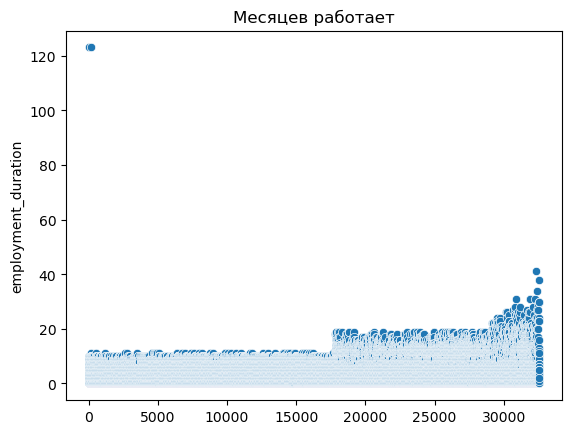

In [23]:
sns.scatterplot(df['employment_duration']).set_title('Месяцев работает')

<AxesSubplot: xlabel='employment_duration', ylabel='customer_age'>

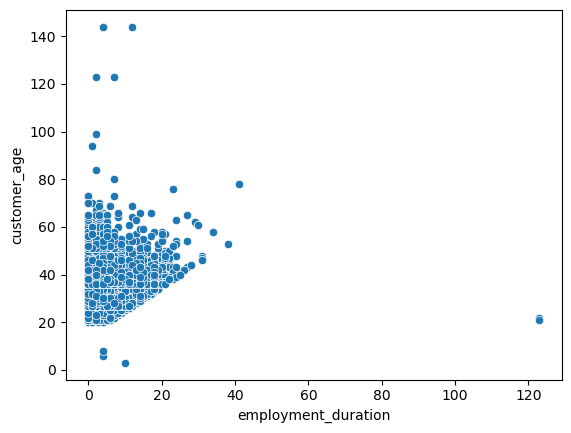

In [24]:
sns.scatterplot(df, x='employment_duration', y='customer_age')

Получили еще выбросы - 20-летние имеют опыт работы 120 месяцев.

In [25]:
nowork = df[df['employment_duration'].isna()]

<AxesSubplot: ylabel='customer_income'>

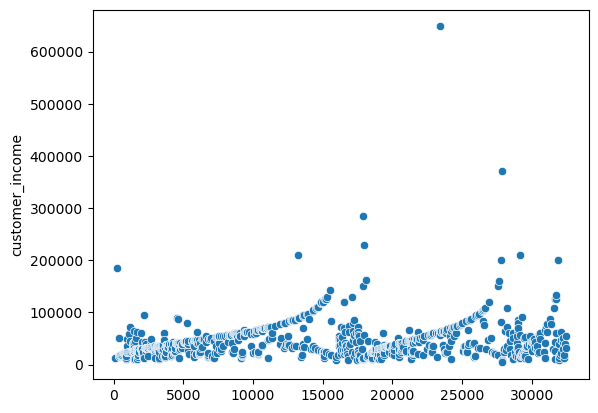

In [26]:
sns.scatterplot(nowork['customer_income'].astype('float'))

In [27]:
nowork[nowork['customer_income'].astype('float') == 0]

,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status


Можно заполнить данные пропуски, основываясь на возрасте

In [28]:
dict_age_duration = df.groupby('customer_age')['employment_duration'].mean().to_dict()

In [29]:
def set_nan_employment(row):
    if pd.isna(row['employment_duration']):
        age = row['customer_age']
        return dict_age_duration[age]
    else:
        return row['employment_duration']

In [30]:
df['employment_duration'] = df.apply(set_nan_employment, axis=1)

In [31]:
df['employment_duration'].info()

<class 'pandas.core.series.Series'>
Int64Index: 32581 entries, 0 to 32585
Series name: employment_duration
Non-Null Count  Dtype  
--------------  -----  
32581 non-null  float64
dtypes: float64(1)
memory usage: 509.1 KB


### loan_int_rate

In [32]:
df['loan_int_rate'].head()

0    16.02
1    11.14
2    12.87
3    15.23
4    14.27
Name: loan_int_rate, dtype: float64

In [33]:
df[df['loan_int_rate'].isna()]

,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
39,23,71500,RENT,3.0,DEBTCONSOLIDATION,C,30000.0,NaN,10,N,4,DEFAULT
50,24,78000,RENT,4.0,DEBTCONSOLIDATION,C,30000.0,NaN,10,Y,4,DEFAULT
57,23,277000,OWN,3.0,PERSONAL,A,35000.0,NaN,10,NaN,4,NO DEFAULT
59,24,12000,OWN,2.0,VENTURE,D,1750.0,NaN,4,Y,3,NO DEFAULT
62,26,263000,MORTGAGE,0.0,EDUCATION,A,10000.0,NaN,6,N,4,DEFAULT
...,...,...,...,...,...,...,...,...,...,...,...,...
32552,53,4888,OWN,0.0,VENTURE,C,1400.0,NaN,3,Y,28,DEFAULT
32557,65,45900,RENT,2.0,EDUCATION,C,10000.0,NaN,5,Y,19,NO DEFAULT
32558,54,20000,RENT,2.0,MEDICAL,C,5000.0,NaN,4,NaN,28,NO DEFAULT
32574,51,60000,MORTGAGE,1.0,PERSONAL,A,7500.0,NaN,1,NaN,23,NO DEFAULT


Проверим как связана ставка с этими признаками:  
    
loan_intent - цель заема  
loan_grade - оценка заема  
loan_amnt - запрошенная сумма кредита  
term_years - срок кредита   

Text(0.5, 1.0, 'Цель заема - Процентная ставка')

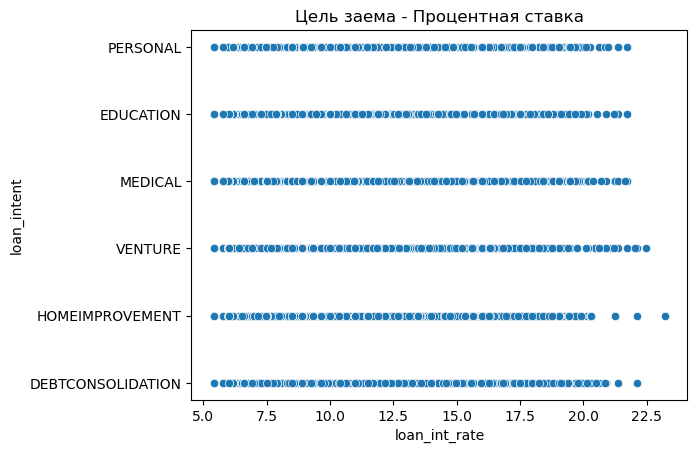

In [34]:
sns.scatterplot(df, x='loan_int_rate', y='loan_intent').set_title('Цель заема - Процентная ставка')

Text(0.5, 1.0, 'Оценка - Процентная ставка')

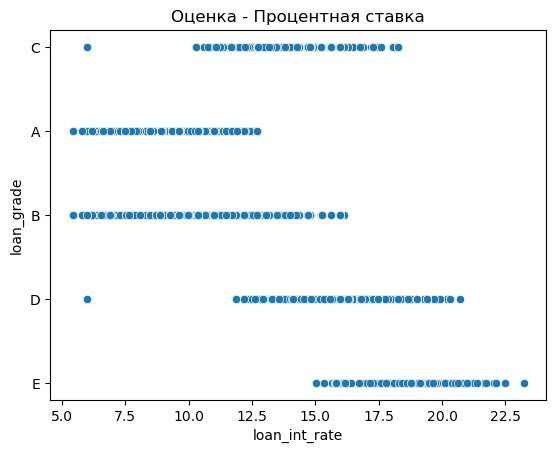

In [35]:
sns.scatterplot(df, x='loan_int_rate', y='loan_grade').set_title('Оценка - Процентная ставка')

(5.0, 24.0, 0.0, 40000.0)

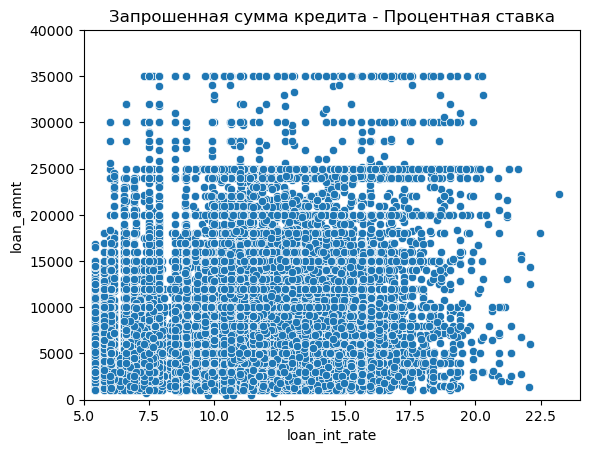

In [36]:
sns.scatterplot(df, x='loan_int_rate', y='loan_amnt').set_title('Запрошенная сумма кредита - Процентная ставка')
plt.axis([5.0, 24, 0, 40000])

Text(0.5, 1.0, 'Срок кредита - Процентная ставка')

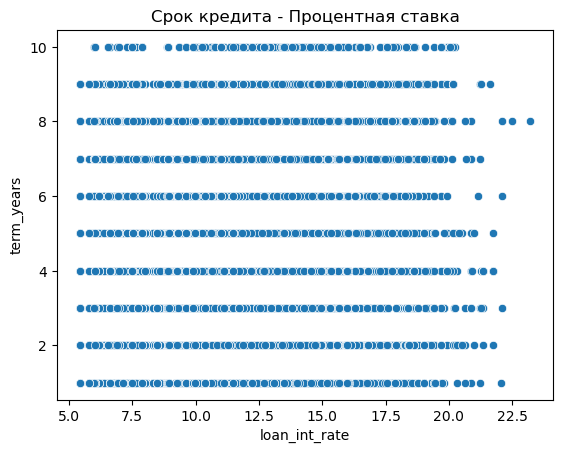

In [37]:
sns.scatterplot(df, x='loan_int_rate', y='term_years').set_title('Срок кредита - Процентная ставка')

Больше всего видна зависимость Оценки и Процентной ставки

Text(0.5, 1.0, 'Оценка - Процентная ставка')

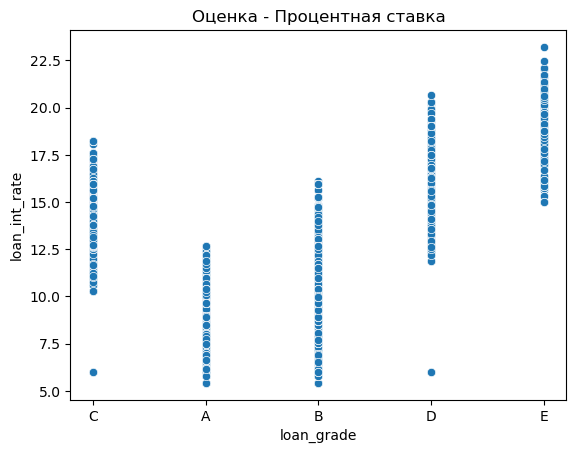

In [38]:
sns.scatterplot(df, y='loan_int_rate', x='loan_grade').set_title('Оценка - Процентная ставка')

In [39]:
c_mean = df[(df['loan_grade'] == 'C') & (df['loan_int_rate'] > 10)]['loan_int_rate'].mean()
print(c_mean)

14.239638932496076


In [40]:
a_mean = df[df['loan_grade'] == 'A']['loan_int_rate'].mean()
print(a_mean)

8.557418240766845


In [41]:
b_mean = df[df['loan_grade'] == 'B']['loan_int_rate'].mean()
print(b_mean)

11.788434386914279


In [42]:
d_mean = df[(df['loan_grade'] == 'D') & (df['loan_int_rate'] > 10)]['loan_int_rate'].mean()
print(d_mean)

15.967446102819235


In [43]:
e_mean = df[df['loan_grade'] == 'E']['loan_int_rate'].mean()
print(e_mean)

18.964102564102568


In [44]:
dict_grade_rate = {'c': 14.239638932496076,
                   'a': 8.557418240766845,
                   'b': 11.788434386914279,
                   'd': 15.967446102819235,
                   'e': 18.964102564102568}

In [45]:
def set_nan_rate(row):
    if pd.isna(row['loan_int_rate']):
        grade = row['loan_grade']
        return dict_grade_rate[grade]
    else:
        return row['loan_int_rate']

In [46]:
df['loan_int_rate'] = df.apply(set_nan_employment, axis=1)

### historical_default

Можно убрать колонку, так как она содержит очень много пропущенных значений

In [47]:
df = df.drop('historical_default', axis=1)

### Приведение типов

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32581 entries, 0 to 32585
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_age         32581 non-null  int64  
 1   customer_income      32581 non-null  object 
 2   home_ownership       32581 non-null  object 
 3   employment_duration  32581 non-null  float64
 4   loan_intent          32581 non-null  object 
 5   loan_grade           32581 non-null  object 
 6   loan_amnt            32581 non-null  float64
 7   loan_int_rate        32581 non-null  float64
 8   term_years           32581 non-null  int64  
 9   cred_hist_length     32581 non-null  int64  
 10  Current_loan_status  32581 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 3.0+ MB


Есть некоторые данные в customer_income, являются строкой

In [49]:
df['customer_income'] = df['customer_income'].apply(lambda x: x.replace(',', ''))
df['customer_income'] = df['customer_income'].astype(float)

In [50]:
df['home_ownership'].value_counts()

RENT        16448
MORTGAGE    13443
OWN          2583
OTHER         107
Name: home_ownership, dtype: int64

In [51]:
df['loan_intent'].value_counts()

EDUCATION            6453
MEDICAL              6072
VENTURE              5717
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3606
Name: loan_intent, dtype: int64

In [52]:
df['loan_grade'].value_counts()

A    15660
B     9063
C     4925
D     2628
E      305
Name: loan_grade, dtype: int64

In [53]:
df['term_years'].value_counts()

3     5741
2     4331
4     4210
7     3741
5     3419
8     2848
6     2787
9     2617
1     2534
10     353
Name: term_years, dtype: int64

In [54]:
df['cred_hist_length'].value_counts()

2     5966
3     5945
4     5925
8     1901
7     1901
9     1894
5     1881
6     1856
10    1849
14     492
12     486
11     463
16     452
13     443
15     436
17     407
20      31
24      30
28      27
27      22
22      22
23      22
30      22
19      21
21      20
18      19
25      18
26      16
29      14
Name: cred_hist_length, dtype: int64

Преобразуем целевую переменную

In [55]:
df['Current_loan_status'] = df['Current_loan_status'].replace({'DEFAULT': 1,
                                  'NO DEFAULT': 0})

# Корреляция

C:\Users\Gekcer\AppData\Local\Temp\ipykernel_12128\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

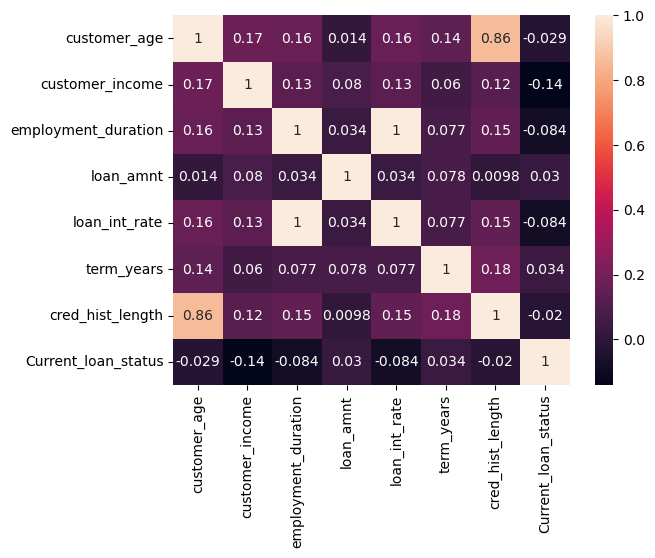

In [56]:
sns.heatmap(df.corr(), annot=True)

<AxesSubplot: xlabel='customer_age', ylabel='cred_hist_length'>

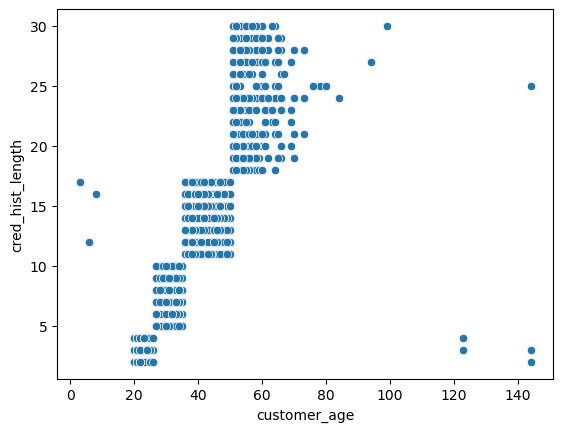

In [57]:
sns.scatterplot(df, x='customer_age', y='cred_hist_length')

# Выбросы

Возраст: следует убрать людей старше 80 и младше 20

In [58]:
df = df[(df['customer_age'] >= 20) & (df['customer_age'] <= 80)]

Уберем аномальную сумму кредита

In [59]:
df = df[df['loan_amnt'] < 2e6]

<AxesSubplot: xlabel='customer_age', ylabel='cred_hist_length'>

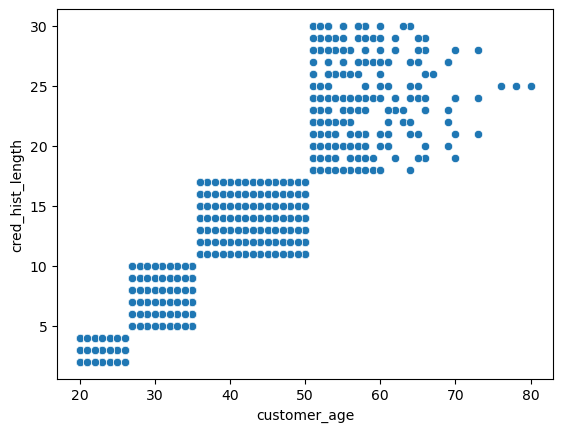

In [60]:
sns.scatterplot(df, x='customer_age', y='cred_hist_length')

In [61]:
numeric_df = df.select_dtypes(exclude='object')

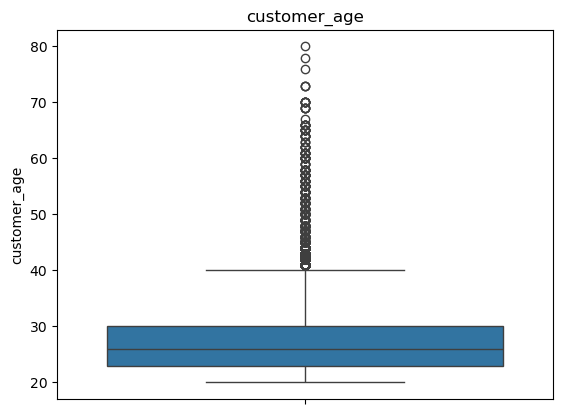

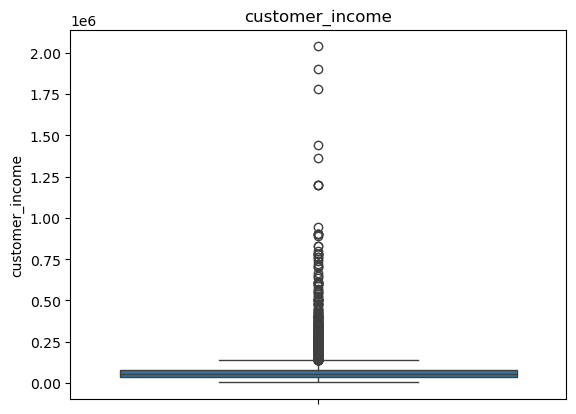

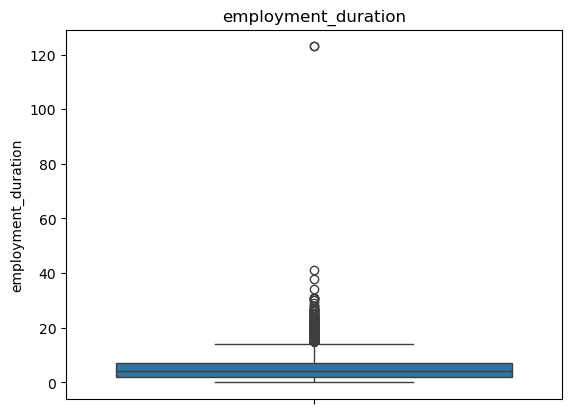

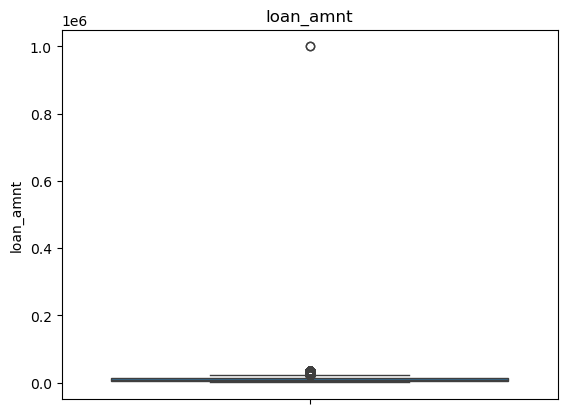

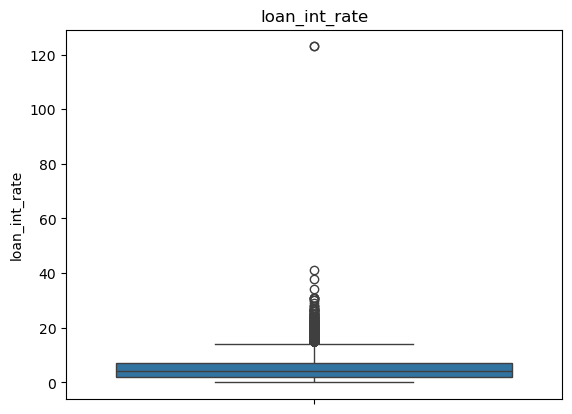

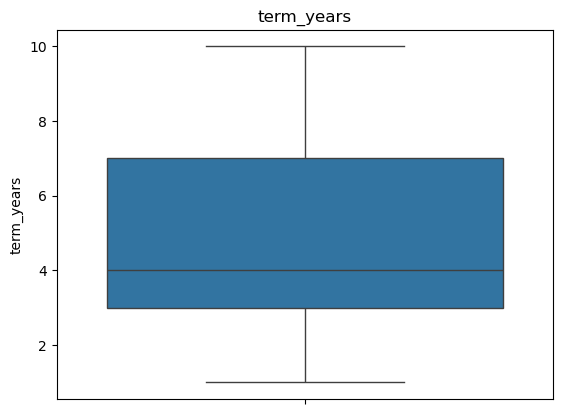

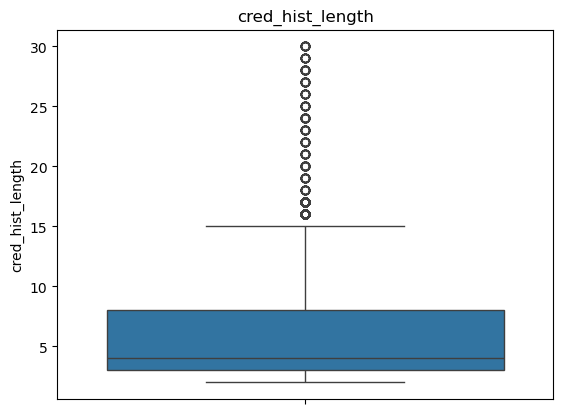

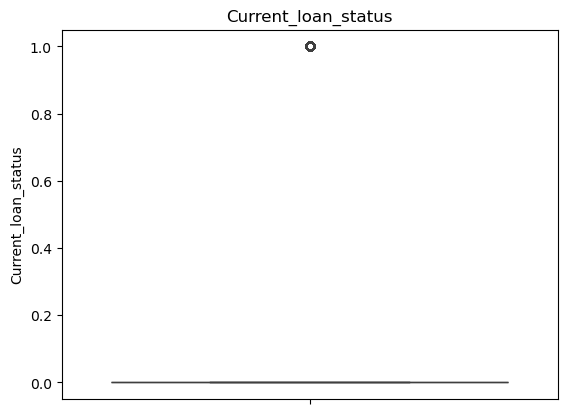

In [62]:
for col in numeric_df.columns:
    plt.figure()
    sns.boxplot(numeric_df[col]).set_title(col)

Ассиметрия: 1.9000609924667813
Эксцесс: 5.350240989678683


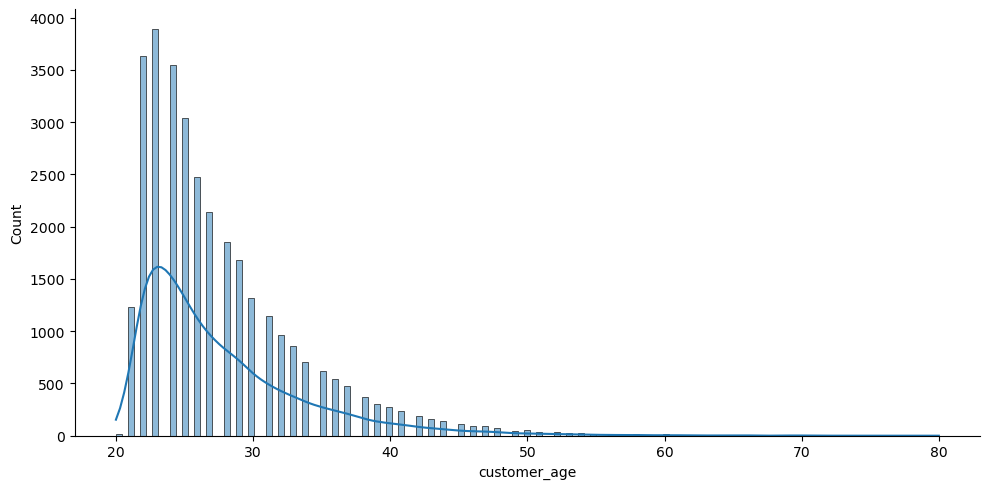

In [63]:
sns.displot(df['customer_age'], kind='hist', kde=True, aspect=2)
print(f"Ассиметрия: {df['customer_age'].skew()}")
print(f"Эксцесс: {df['customer_age'].kurt()}")

Ассиметрия: 1.1677779590182853
Эксцесс: 1.4096823524545607


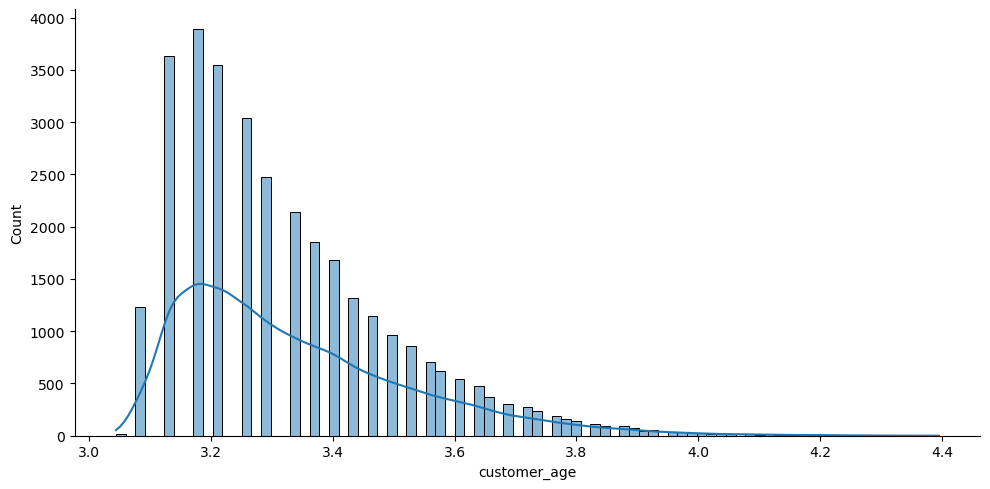

In [64]:
sns.displot(np.log1p(df['customer_age']), kind='hist', kde=True, aspect=2)
print(f"Ассиметрия: {np.log1p(df['customer_age']).skew()}")
print(f"Эксцесс: {np.log1p(df['customer_age']).kurt()}")

In [65]:
df['customer_age'] = np.log1p(df['customer_age'])

Ассиметрия: 9.752843068691663
Эксцесс: 224.91416895298562


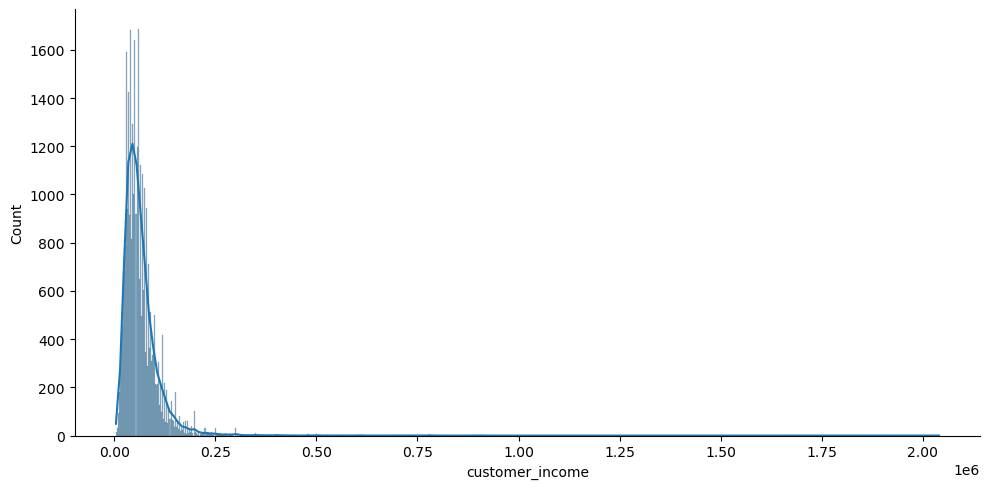

In [66]:
sns.displot(df['customer_income'], kind='hist', kde=True, aspect=2)
print(f"Ассиметрия: {df['customer_income'].skew()}")
print(f"Эксцесс: {df['customer_income'].kurt()}")

Ассиметрия: 0.13952334890332754
Эксцесс: 1.1299059229271577


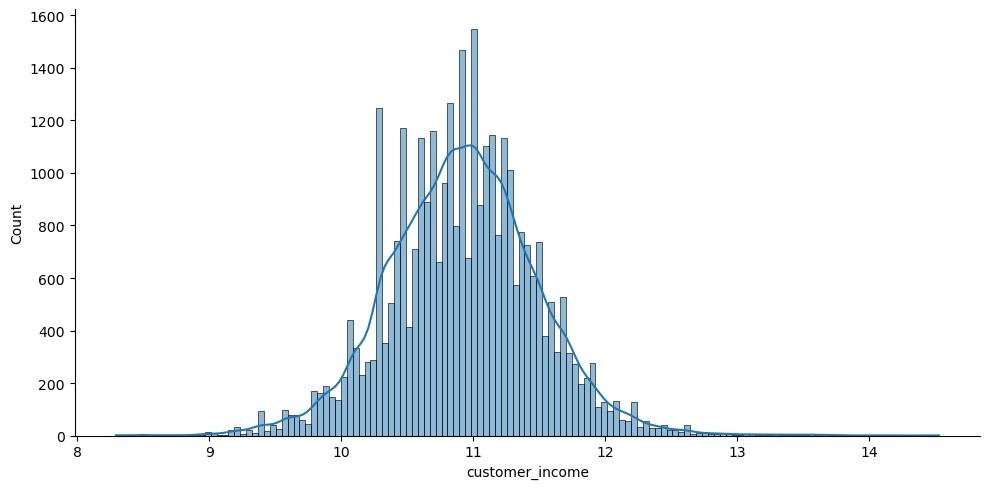

In [67]:
sns.displot(np.log1p(df['customer_income']), kind='hist', kde=True, aspect=2)
print(f"Ассиметрия: {np.log1p(df['customer_income']).skew()}")
print(f"Эксцесс: {np.log1p(df['customer_income']).kurt()}")

In [68]:
df['customer_income'] = np.log1p(df['customer_income'])

<AxesSubplot: ylabel='employment_duration'>

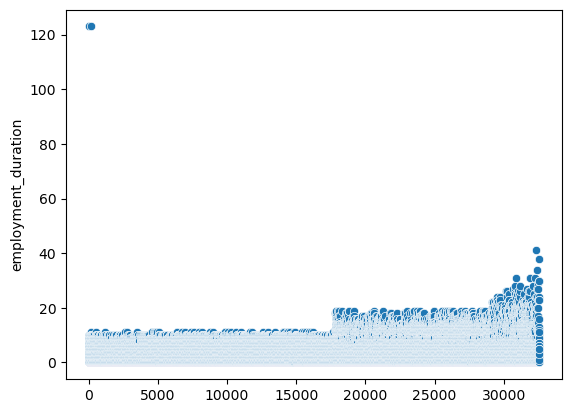

In [69]:
sns.scatterplot(df['employment_duration'])

In [70]:
df = df[df['employment_duration'] < 60]

Ассиметрия: 1.2641713897289721
Эксцесс: 2.5554614846996437


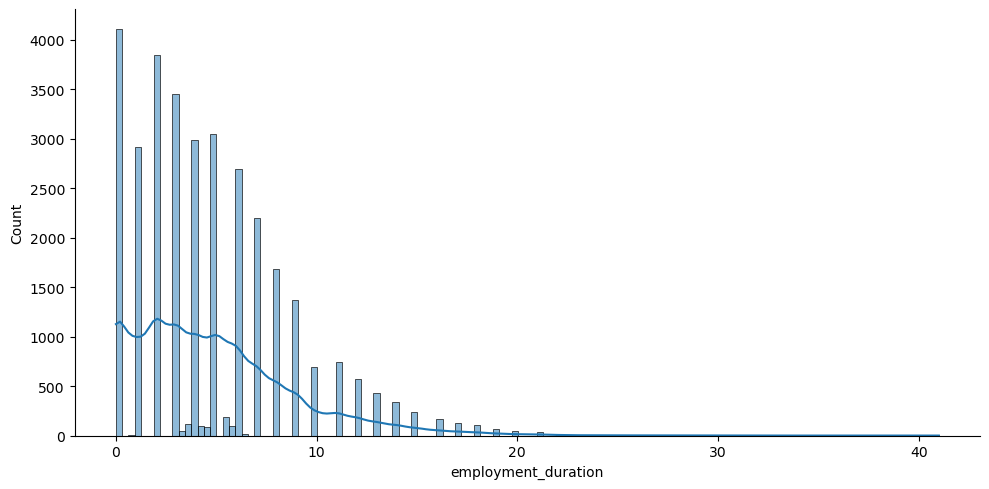

In [71]:
sns.displot(df['employment_duration'], kind='hist', kde=True, aspect=2)
print(f"Ассиметрия: {df['employment_duration'].skew()}")
print(f"Эксцесс: {df['employment_duration'].kurt()}")

<AxesSubplot: ylabel='loan_amnt'>

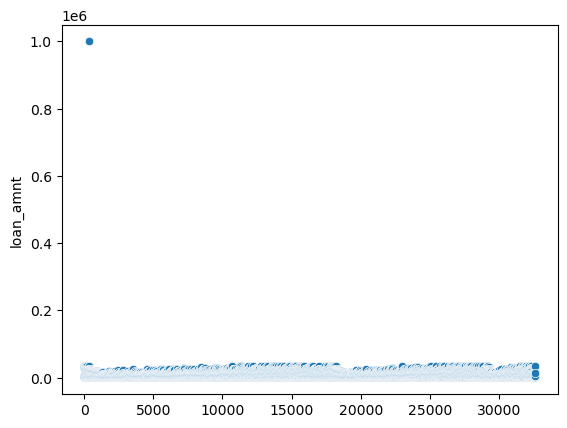

In [72]:
sns.scatterplot(df['loan_amnt'])

In [73]:
df = df[df['loan_amnt'] <0.4e6]

Ассиметрия: 1.1911503003567006
Эксцесс: 1.4184984733640156


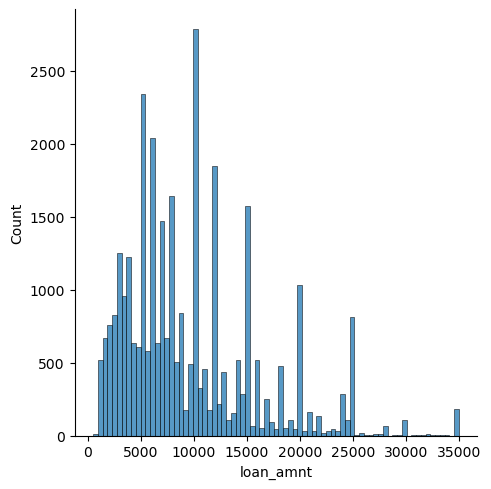

In [74]:
sns.displot(df['loan_amnt'])
print(f"Ассиметрия: {df['loan_amnt'].skew()}")
print(f"Эксцесс: {df['loan_amnt'].kurt()}")

<AxesSubplot: ylabel='loan_int_rate'>

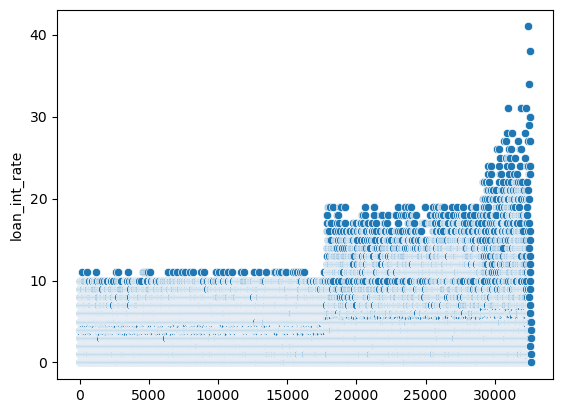

In [75]:
sns.scatterplot(df['loan_int_rate'])

<AxesSubplot: ylabel='cred_hist_length'>

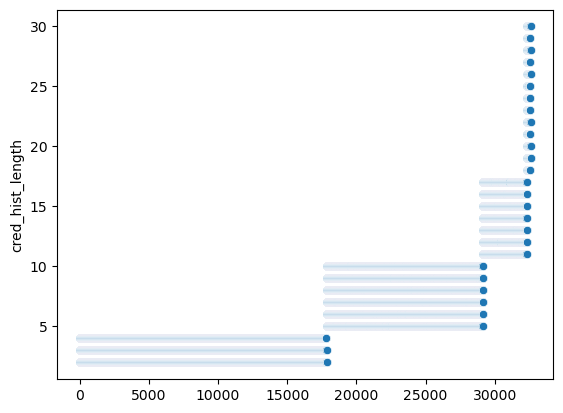

In [76]:
sns.scatterplot(df['cred_hist_length'])

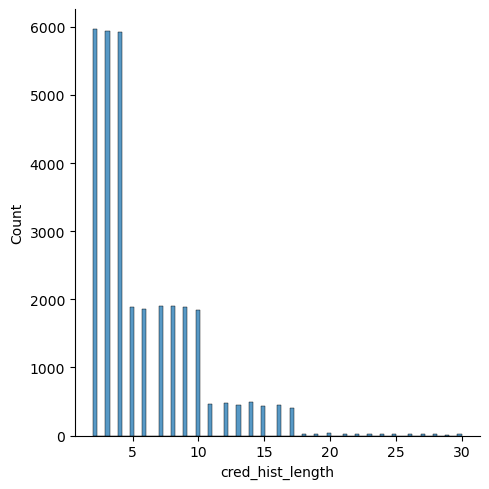

In [77]:
sns.displot(df['cred_hist_length'])


In [88]:
df['Current_loan_status'].value_counts()

0    25730
1     6835
Name: Current_loan_status, dtype: int64

Классы не сбалансированы - попробуем использовать RandomForestClassifier

# Обработка признаков

In [78]:
numeric_df = df.select_dtypes(exclude='object')
numeric_columns = numeric_df.columns
object_df = df.select_dtypes(include='object')

In [79]:
object_dummies = pd.get_dummies(object_df, drop_first=True)

In [80]:
object_dummies.head()

,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E
1,0,1,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,1,0,0,0
3,0,0,1,0,0,1,0,0,1,0,0,0
4,0,0,1,0,0,1,0,0,1,0,0,0
5,0,1,0,0,0,0,0,1,0,0,0,0


In [81]:
df = pd.concat([numeric_df, object_dummies], axis=1)

In [82]:
df.head()

,customer_age,customer_income,employment_duration,loan_amnt,loan_int_rate,term_years,cred_hist_length,Current_loan_status,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E
1,3.091042,9.169623,5.0,1000.0,5.0,1,2,0,0,1,0,1,0,0,0,0,0,0,0,0
2,3.258097,9.169623,1.0,5500.0,1.0,5,3,1,0,0,0,0,0,1,0,0,1,0,0,0
3,3.178054,11.089821,4.0,35000.0,4.0,10,2,1,0,0,1,0,0,1,0,0,1,0,0,0
4,3.218876,10.904138,8.0,35000.0,8.0,10,4,1,0,0,1,0,0,1,0,0,1,0,0,0
5,3.091042,9.200391,2.0,2500.0,2.0,1,2,1,0,1,0,0,0,0,0,1,0,0,0,0


# Обучение модели

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, auc

In [84]:
X = df.drop('Current_loan_status', axis=1)
y = df['Current_loan_status']

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [101]:
rfc = RandomForestClassifier()
weight = 'balanced'
max_depths = [12, 14, 18, 20]
min_samples_splits = [1]
n_estimatorss = [100]
min_samples_leaves = [2]

param_grid = {'max_depth': max_depths,
             'min_samples_split': min_samples_splits,
             'n_estimators': n_estimatorss,
             'min_samples_leaf': min_samples_leaves}

grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [12, 14, 18, 20], 'min_samples_leaf': [2],
                         'min_samples_split': [1], 'n_estimators': [100]})

In [102]:
grid_search.best_params_

{'max_depth': 20,
 'min_samples_leaf': 2,
 'min_samples_split': 1,
 'n_estimators': 100}

In [106]:
rfc = RandomForestClassifier(max_depth=20, min_samples_leaf=2,
                            min_samples_split=1, n_estimators=100)
rfc.fit(X_train, y_train)
y_preds = rfc.predict(X_test)

In [114]:
accuracy_score(y_test, y_preds)

0.9281437125748503

In [115]:
cm = confusion_matrix(y_test, y_preds)

Text(50.722222222222214, 0.5, 'Real')

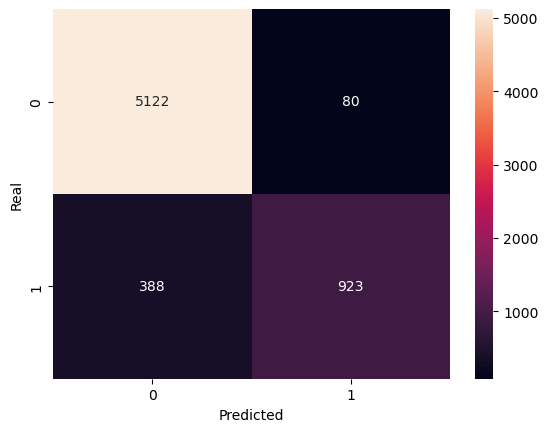

In [128]:
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Real')

In [134]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96      5202
           1       0.92      0.70      0.80      1311

    accuracy                           0.93      6513
   macro avg       0.92      0.84      0.88      6513
weighted avg       0.93      0.93      0.92      6513



In [145]:
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, y_preds)
roc_auc = auc(fpr, tpr)

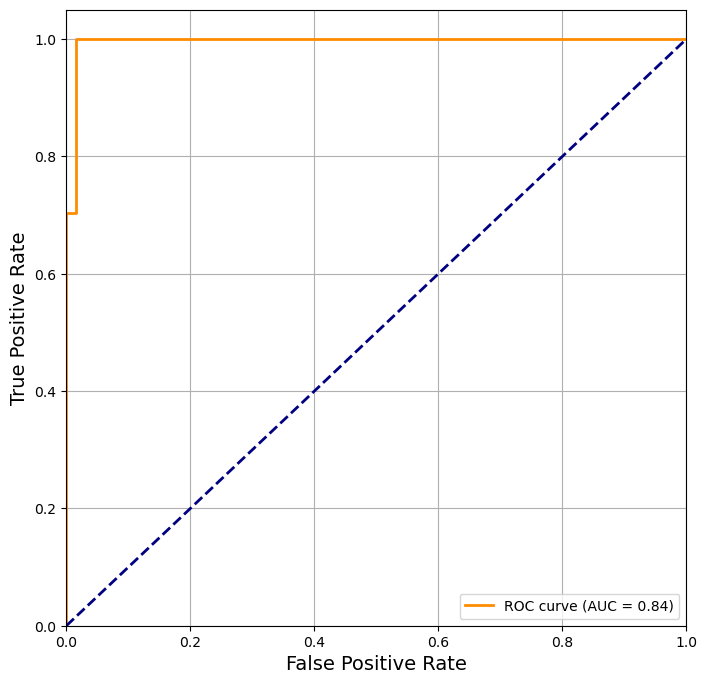

In [157]:
plt.figure(figsize=(8, 8))
plt.step(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()